In [55]:
import numpy as np
from sklearn.manifold import TSNE
from simtool.indexing import Indexer
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
ls -ltr /s/mlsc/abake116/geodata/train/

total 1536
drwx------ 2 abake116 hadoop 262144 Jul 16 18:23 rhyolite/
drwx------ 2 abake116 hadoop 262144 Jul 16 18:23 schist/
drwx------ 2 abake116 hadoop 262144 Jul 16 18:23 andesite/
drwx------ 2 abake116 hadoop 262144 Jul 16 18:23 gneiss/
drwx------ 2 abake116 hadoop 262144 Jul 16 18:23 quartzite/
drwx------ 2 abake116 hadoop 262144 Jul 16 18:23 marble/


In [3]:
path = '/s/mlsc/abake116/geodata/embeddings/train'
indexer = Indexer()
embeddings,paths = indexer._gather_embeddings(path)

In [4]:
embeddings.shape

(28384, 128)

In [13]:
sample = np.random.choice(range(embeddings.shape[0]),10000,replace=False)

In [14]:
components = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300).fit_transform(embeddings[sample])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.039s...
[t-SNE] Computed neighbors for 10000 samples in 6.645s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 9.334254
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.240936
[t-SNE] KL divergence after 300 iterations: 2.747176


In [7]:
labels = {
    "marble": 0,
    "rhyolite": 1,
    "schist":2,
    "andesite":3,
    "gneiss": 4,
    "quartzite": 5
}

In [56]:
types = [Path(p).parts[-2] for p in paths]

In [22]:
x,y = components.T

In [50]:
colors = [labels[p.split('/')[-2]] / 6 for p in paths]

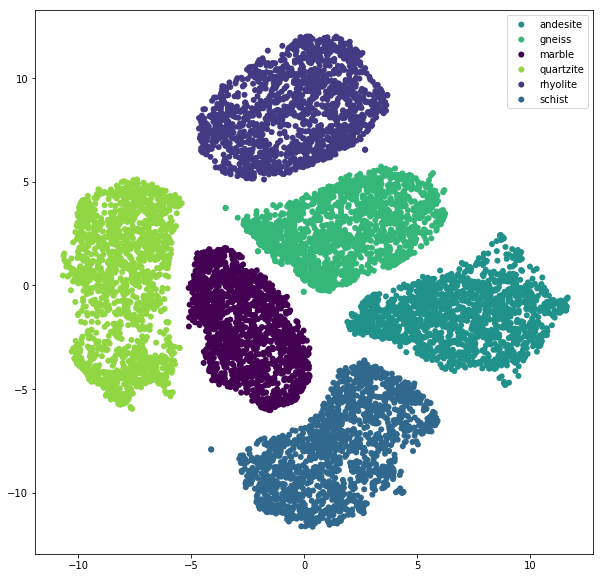

In [58]:
df = pd.DataFrame({"x":x, 
                   "y":y, 
                   "colors":np.array(colors)[sample],
                   "type":np.array(types)[sample]})

cmap = plt.cm.viridis

plt.figure(figsize=(10,10))
for i, dff in df.groupby("type"):
    plt.scatter(dff['x'], dff['y'], c=cmap(dff['colors']), 
                edgecolors='none', label="{}".format(i))
    
plt.legend(loc='')
plt.show()